In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
num_filters, kernel_size, strides = 7, 3, 2
num_test_img = 10

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class Encoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2d = Conv2D(self.filters, self.kernel_size, activation='relu', padding='same', strides=self.strides)
    
    def call(self, inputs):
        x = self.conv2d(inputs)
        return x

In [6]:
class Decoder(Layer):
    def __init__(self, filters=16, kernel_size=3, strides=2, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
    
    def build(self, input_shape):
        self.conv2dtranspose = Conv2DTranspose(self.filters, kernel_size=self.kernel_size, strides=self.strides, activation='relu', padding='same')
        self.conv2d = Conv2D(3, kernel_size=self.kernel_size, activation='sigmoid', padding='same')
    
    def call(self, inputs):
        x = self.conv2dtranspose(inputs)
        x = self.conv2d(x)
        return x

In [7]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(filters=num_filters, kernel_size=kernel_size, strides=strides, name="encoder")
        self.decoder = Decoder(filters=num_filters, kernel_size=kernel_size, strides=strides, name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [8]:
autoencoder = AutoEncoder(name="autoencoder")

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 9.9997e-04 - val_loss: 9.6437e-04
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 9.6027e-04 - val_loss: 9.6090e-04
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 9.3609e-04 - val_loss: 9.0275e-04
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 9.1506e-04 - val_loss: 9.0138e-04
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 9.0198e-04 - val_loss: 8.7516e-04
Epoch 10/10
1563/1563 [=

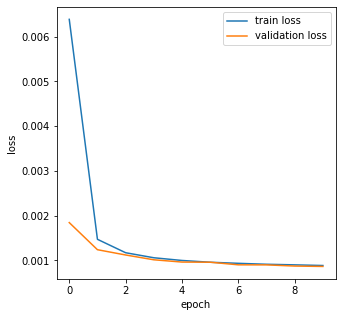

In [11]:
fig = plt.figure(figsize=(5, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

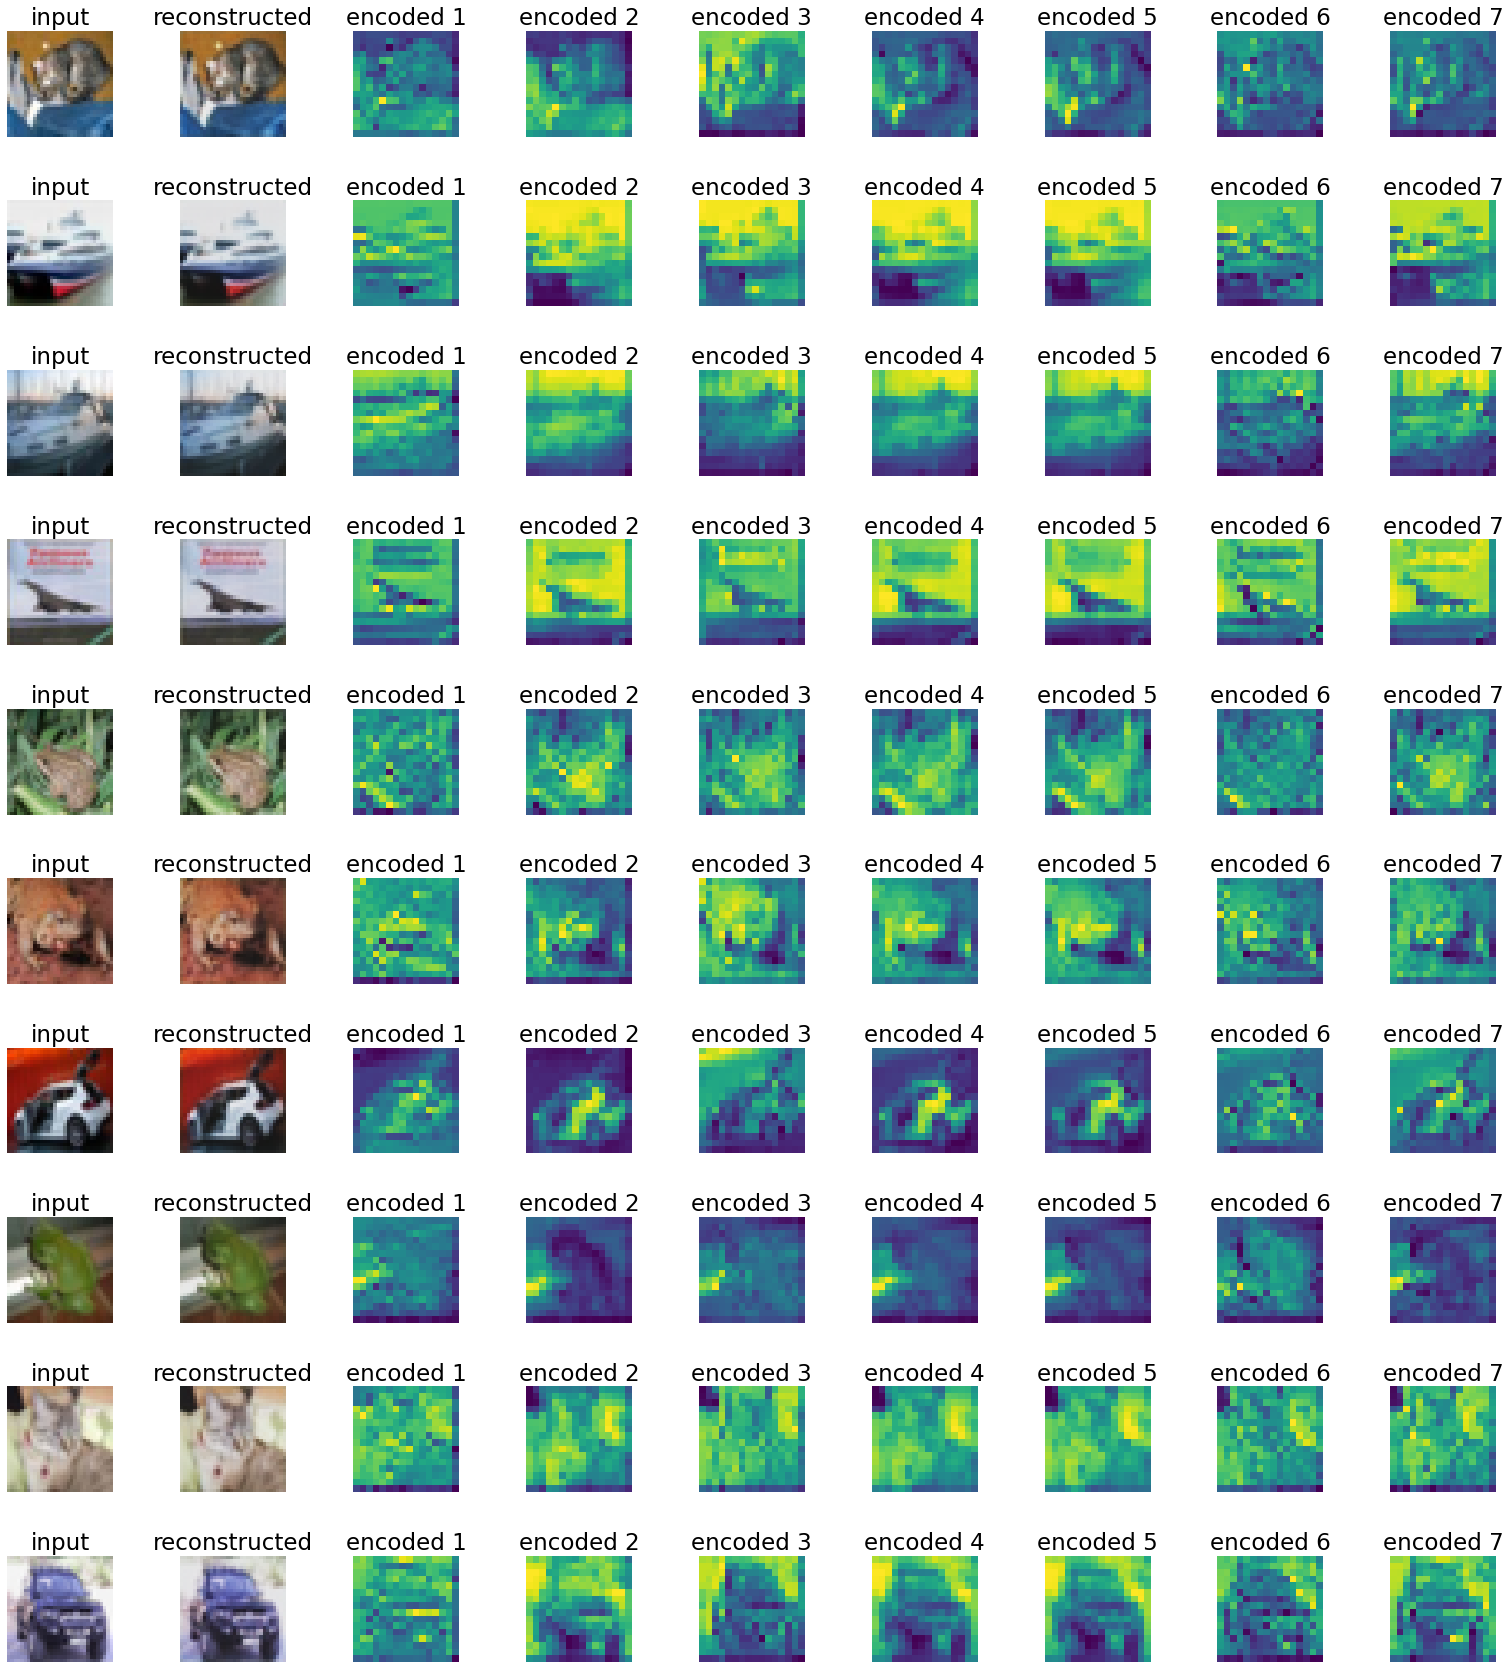

In [12]:
fig = plt.figure(figsize=(3 * (2 + num_filters), 3 * num_test_img))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(num_test_img):
    x = tf.expand_dims(x_test[i], 0)
    encoded = autoencoder.get_layer("encoder")(x)
    predicted = autoencoder.predict(x)
    ax1 = fig.add_subplot(num_test_img, (2 + num_filters), (2 + num_filters) * i + 1)
    ax1.axis('off')
    ax1.set_title('input', fontsize=23)
    ax1.imshow(x_test[i])
    ax2 = fig.add_subplot(num_test_img, (2 + num_filters), (2 + num_filters) * i + 2)
    ax2.axis('off')
    ax2.set_title('reconstructed', fontsize=23)
    ax2.imshow(predicted[0])
    for j in range(num_filters):
        ax = fig.add_subplot(num_test_img, (2 + num_filters), (2 + num_filters) * i + j + 3)
        ax.axis('off')
        ax.set_title(f'encoded {j + 1}', fontsize=23)
        ax.imshow(encoded[0, :, :, j])
plt.show()

In [13]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  196       
_________________________________________________________________
decoder (Decoder)            multiple                  640       
Total params: 836
Trainable params: 836
Non-trainable params: 0
_________________________________________________________________
